# Creating Synthetical Data with Python

This section is about creating synthetic data with just Pandas and Numpy.
The dataset is supposed to be artifical weather data for some German cities.

In [2]:
import numpy as np
import pandas as pd

In [3]:
cities = ['Berlin', 'Frankfurt', 'Hamburg',
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Frieburg', 'Kersruhe']

n = len(cities)

data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)}

df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,23.623177,79.983080,14.042224
Frankfurt,22.065484,75.433773,11.773850
Hamburg,25.668354,76.528952,12.112217
Nuremberg,27.783736,78.857074,16.836092
Munich,26.962991,76.168969,19.834314
Stuttgart,29.811767,80.918774,8.793594
Hanover,23.033784,74.882338,15.675035
Saarbruecken,31.961789,77.791306,12.004961
Cologne,24.689057,76.108078,20.493995
Constance,21.534019,75.141696,20.740097


## Another Example

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

In [6]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)

number_of_items_per_class = [190, 205, 230, 170]
flowers={}
# flos Pythonem:
number_of_items = number_of_items_per_class[0]

reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
                                num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                                num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
                                num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
                               num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:
number_of_items = number_of_items_per_class[1]

reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
                                num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                                num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
                                num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
                               num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

# flos Margarita:
number_of_items = number_of_items_per_class[2]

reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
                                num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
                                num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
                                num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
                               num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:
number_of_items = number_of_items_per_class[3]

reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
                                num=number_of_items)
greens = truncated_normal_ints(mean=245, sd=10, low=240, upp=255,
                                num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
                                num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
                               num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data

data = np.concatenate((flowers['flos_pythonem'],
                       flowers['flos_java'],
                       flowers['flos_margarita'],
                       flowers["flos_artificialis"]
                       ), axis=0)

# assigning the labels
target = np.zeros(sum(number_of_items_per_class))
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num

conc_data = np.concatenate((data, target.reshape(target.shape[0], 1)),
                            axis=1)

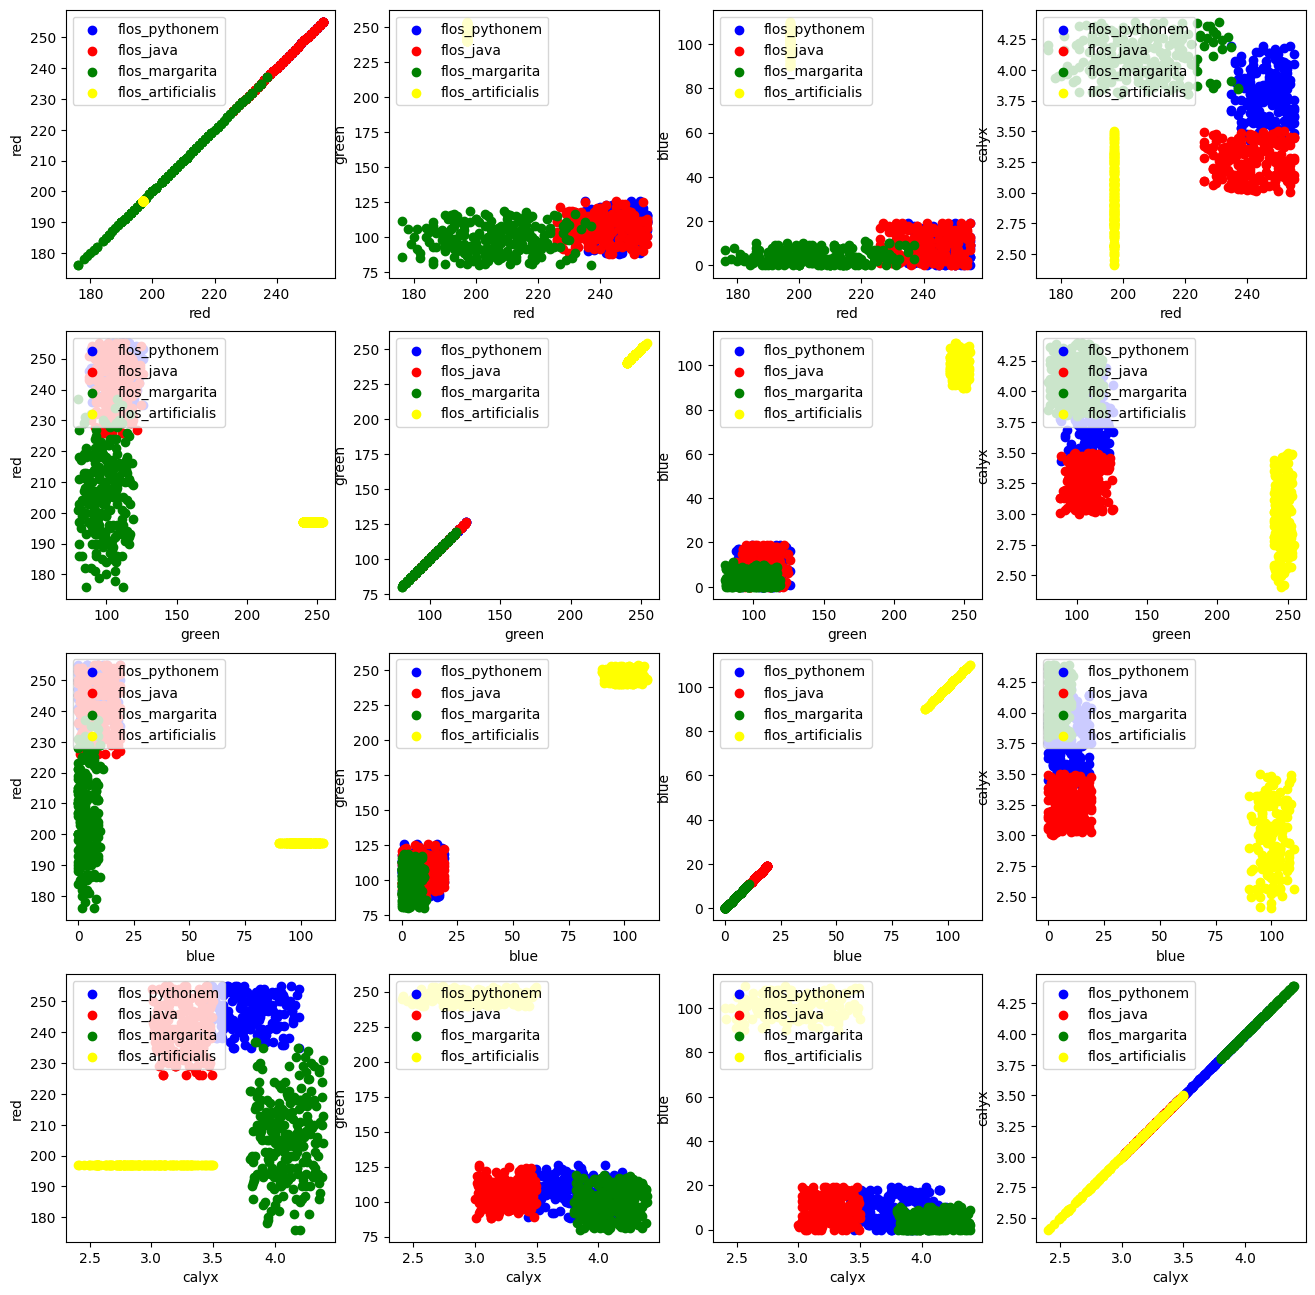

In [8]:
target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(1, len(target_names)+1):
            ax[x, y].scatter(data[target==color_ind, x],
                             data[target==color_ind, y],
                             label=target_names[color_ind-1],
                             c=colors[color_ind-1])
            
        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')

plt.show()

# Generate Synthetic Data with Scikit-Learn

4 different functionalities available in sklearn can be grouped into:
1. Generators for classification and clustering
2. Generators for creating data for regression
3. Generators for manifold learning
4. Generators for decomposition

## Generators for Classification and Clustering
Starting with the `make_blobs` of `sklearn.datasets` to create 'blob' like data distributions. 
By setting the value of `centers` to `n_classes`, we determine the number of blobs, i.e. clusters. `n_samples` corresponds to the total number of points equally divided among clusters. If `random_state` is not set, we will have random results every time we call the function. 

In [21]:
from sklearn.datasets import make_blobs

n_classes = 4
data, labels = make_blobs(n_samples=1000,
                          centers=n_classes,
                          random_state=100)

labels[:7]

array([1, 3, 1, 3, 1, 3, 2])

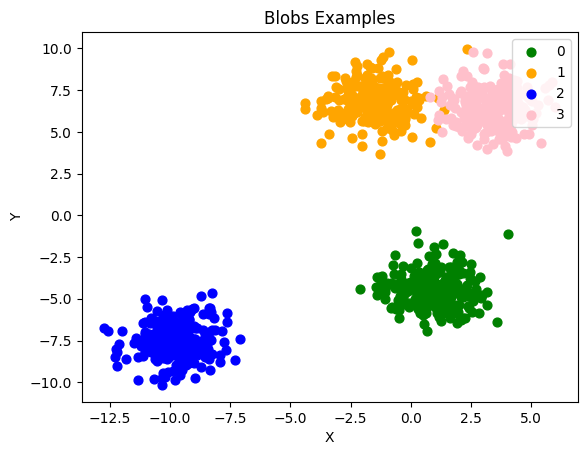

In [22]:
fig, ax = plt.subplots()

colors = ('green', 'orange', 'blue', 'pink')
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0],
               y=data[labels==label, 1],
               c=colors[label],
               s=40,
               label=label)
    
ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')

ax.legend(loc='upper right')

The centers of the blobs were randomly chosen in the previous example. However, we can set the centers explicitly

In [24]:
centers = [[2, 3], [4, 5], [7, 9]]
data, labels = make_blobs(n_samples=1000,
                          centers = np.array(centers),
                          random_state=1)

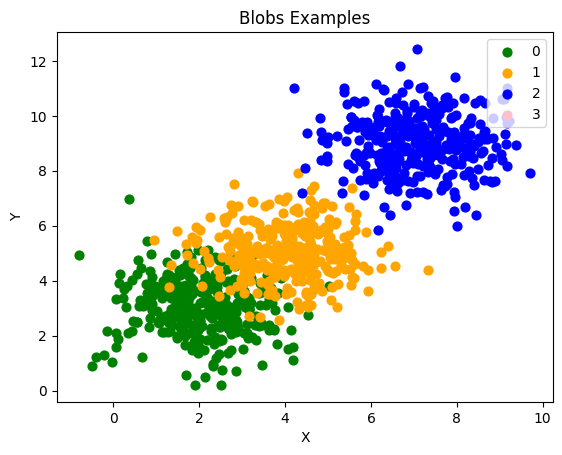

In [25]:
fig, ax = plt.subplots()

colors = ('green', 'orange', 'blue', 'pink')
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0],
               y=data[labels==label, 1],
               c=colors[label],
               s=40,
               label=label)
    
ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')

ax.legend(loc='upper right')

Usually, we want to save our created datasets in a file, and we can do this using `savetxt` from numpy.

First though, comes rearranging our data

In [26]:
labels = labels.reshape((labels.shape[0], 1))

all_data = np.concatenate((data, labels), axis=1)
all_data[:7]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ]])

In [27]:
np.savetxt('blobs_test.txt',
           all_data,
           fmt=['%.3f', '%.3f', '%1d'])

all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

### Reading the Data, and Conversion Back into 'data' and 'labels'

In [30]:
file_data = np.loadtxt('blobs_test.txt')

data = file_data[:, :-1]
labels = file_data[:, 2:]

labels = labels.reshape(labels.shape[0])

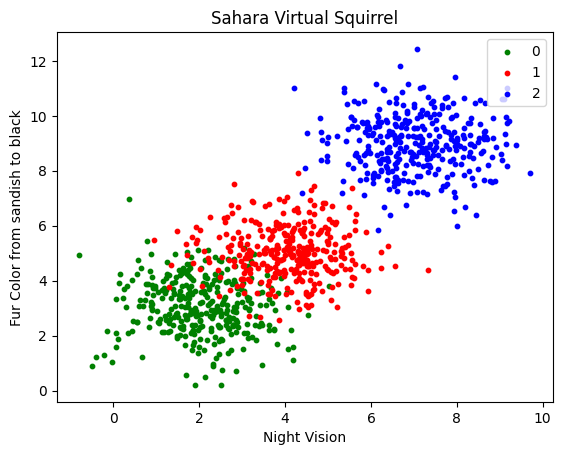

In [31]:
colors = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colors[n_class], s=10, label=str(n_class))
    
ax.set(xlabel='Night Vision',
       ylabel='Fur Color from sandish to black',
       title='Sahara Virtual Squirrel')

ax.legend(loc='upper right')

Now, training a model on this data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)


knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train, y_train)

calculated_labels = knn.predict(X_test)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [34]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, calculated_labels))

Accuracy: 0.97


### Other Interesting Distributions

In [38]:
import sklearn.datasets as ds 

data, labels = ds.make_moons(n_samples=150,
                             shuffle=True,
                             noise=0.19,
                             random_state=None)

data += np.array(-np.ndarray.min(data[:,0]),
                 -np.ndarray.min(data[:,1]))

np.ndarray.min(data[:, 0]), np.ndarray.min(data[:, 1])


(0.0, 0.49384934539061354)

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Moons')]

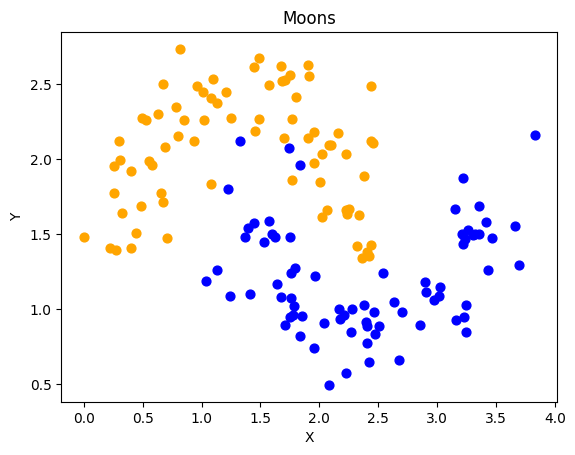

In [39]:
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1],
           c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
           c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='Moons')


We want to scale values that are in a range `[min, max]` in a range `[a, b]`

We can use the formula 
    f(x) = (((b-a)*(x-min))/(max-min)) + a

to transform the X and Y coordinates of `data` into other ranges:

In [41]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20

data, labels = ds.make_moons(n_samples=100,
                             shuffle=True,
                             noise=0.05,
                             random_state=None)

min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])


data -= np.array([min_x, min_y])
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),
                  (max_y_new - min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new])

data[:6]

array([[68.41578117, 16.9337284 ],
       [50.78207374, 19.82771618],
       [51.60855958, 19.54714813],
       [57.03931497, 13.37553473],
       [68.19085374, 14.78871656],
       [70.36009334, 12.06874675]])

In [42]:
def scale_data(data, new_limits, inplace=False):
    if not inplace:
        data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
    min_x_new, max_x_new = new_limits[0]
    min_y_new, max_y_new = new_limits[1]
    data -= np.array([min_x, min_y])
    data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),
                      (max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new])

    if inplace:
        return None
    else:
        return data
    

data, labels = ds.make_moons(n_samples=100, shuffle=True,
                             noise=0.05, random_state=None)

scale_data(data, [(1, 4), (3, 8)], inplace=True)
data[:10]

array([[1.55081803, 7.52085873],
       [1.99721076, 6.36318078],
       [3.55242299, 4.24215253],
       [2.03682942, 5.1232098 ],
       [3.12268232, 3.36745637],
       [1.01448031, 5.81609408],
       [2.9549145 , 5.53367044],
       [3.67597812, 4.19651338],
       [1.77522817, 7.85911752],
       [3.06858206, 3.        ]])

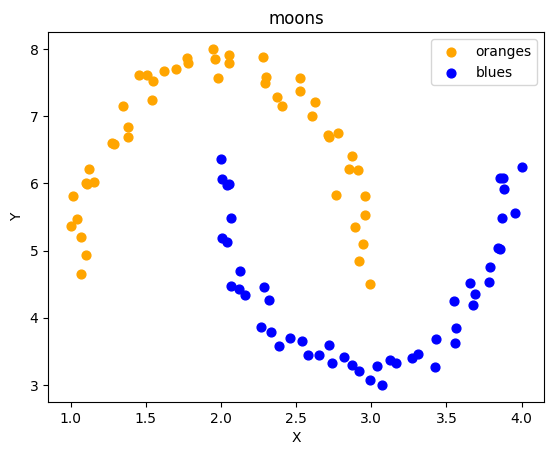

In [44]:
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1],
           c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
           c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='moons')

ax.legend(loc='upper right');

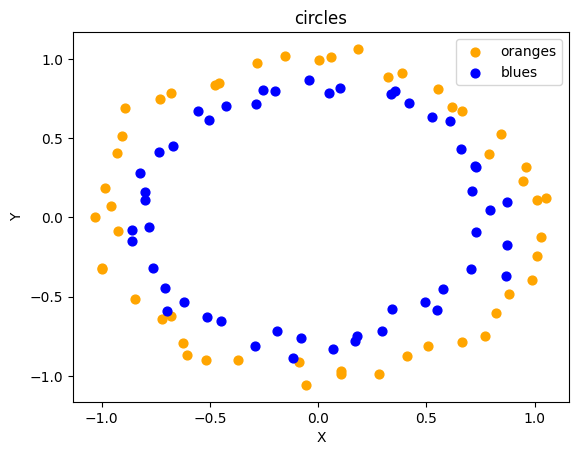

In [46]:
data, labels = ds.make_circles(n_samples=100,
                               shuffle=True,
                               noise=0.05,
                               random_state=None)

fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1],
           c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
           c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='circles')

ax.legend(loc='upper right')

# Exercises

In [58]:
clusters = [(4, 1), (1, 4)]

data, labels = ds.make_blobs(n_samples=50,
                      centers=clusters,
                      random_state=42)



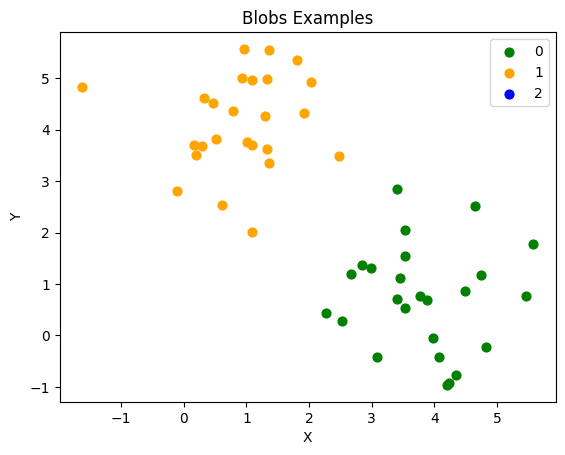

In [59]:
fig, ax = plt.subplots()

colors = ('green', 'orange', 'blue', 'pink')
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0],
               y=data[labels==label, 1],
               c=colors[label],
               s=40,
               label=label)
    
ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')

ax.legend(loc='upper right')